In [5]:
#Description: Use Relative Strength Index (RSI) to determine if stock is being over bought or sold
import pandas as pd
from datetime import datetime,date
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
df = pd.read_csv('HistoricRates_BTC(test)')

In [7]:
#df = df.set_index(pd.DatetimeIndex(df['date'].values))
#df = df.sort_index()

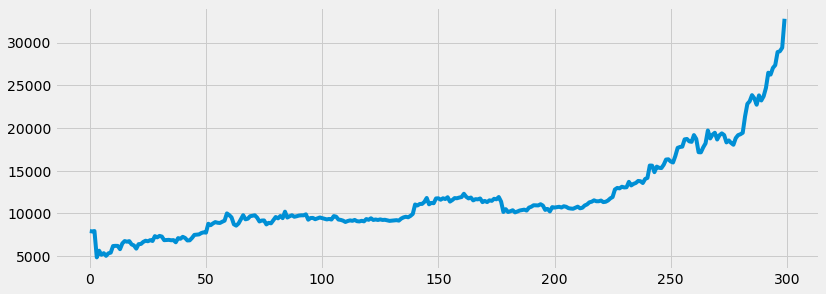

In [8]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['close'])

In [9]:
#Get difference in price from previous day
delta = df['close'].diff(1)
delta = delta.dropna() #Remove NaN

In [10]:
#Get positive and negative gains
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

In [13]:
period = 24
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [14]:
#Calculate RSI
#Calculate Relative Strength
RS = AVG_Gain / AVG_Loss
#Calculate Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

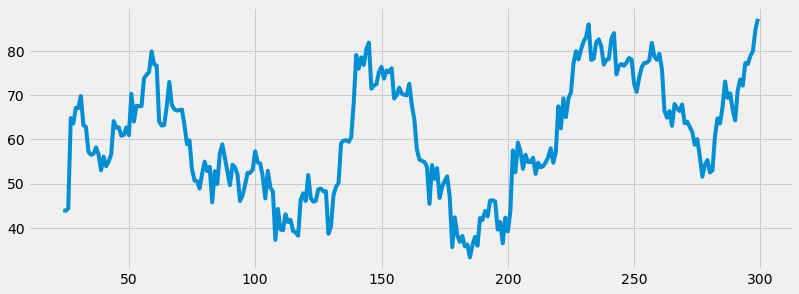

In [15]:
#View RSI
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [17]:
#Bring all together
new_df = pd.DataFrame()
new_df['close'] = df['close']
new_df['RSI'] = RSI
new_df.head(5)

,close,RSI
0,7934.52,NaN
1,7894.68,NaN
2,7938.05,NaN
3,4857.10,NaN
4,5637.60,NaN


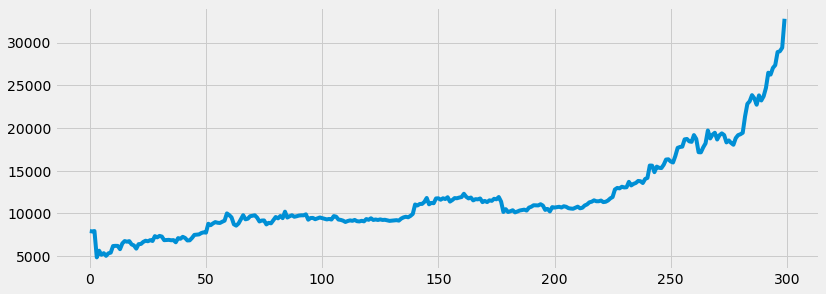

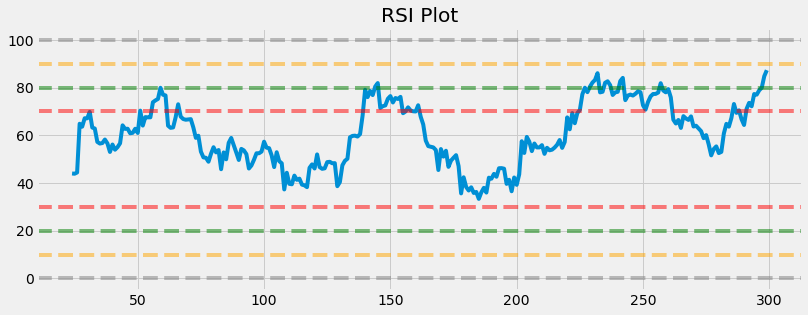

In [18]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['close'])
plt.show()

#Plot corresponding RSI values and sig levels
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index,new_df['RSI'])
plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')